<a href="https://colab.research.google.com/github/IKAR42/SberDS_Study/blob/main/HW_NN_2_cv_v_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# архитектура модели
# гиперпараметры
# загрузчик данных
# формирование батча
# инициализировать модель
# оптимизатор
# функция потерь
# опционально шедулеры
# трейн луп

In [3]:
# hyperparams
inp_dim = 28 * 28
hidden = 256
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}' # 'cuda:0' id GPU
n_epochs = 10
batch_size = 128

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5)),
     ])

# зашружаем тренировочный сет
dataset_train = datasets.MNIST('.', 
                               train=True,            
                               download=True, 
                               transform=transform)

dataset_test = datasets.MNIST('.', 
                              train=False,
                              download=True, 
                              transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

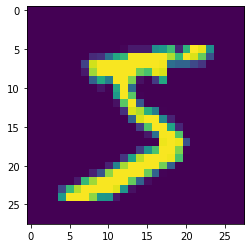

In [6]:

plt.imshow(dataset_train.data[0].detach().numpy())
plt.show()

In [7]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # custom init nn.init.xavier_uniform(self.linear1.weight) 
        self.do = nn.Dropout(dropout_p)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        self.activ = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activ(x)
        x = self.do(x)
        x = self.linear2(x)

        return x


In [8]:
# Как формируется батч
# dataloader берет из Samler набор индексов и по этим индексам получает элементы из Dataset
dataset = datasets.MNIST('.', train=True, download=True)

def collate_fn(data: list):
    # data = [(pic, target)...]
    pics = []
    targets = []
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])
    pics = torch.from_numpy(numpy.array(pics)).float() / 255
    pics = pics.view(pics.size(0), -1) # mtx 28x28 to vec 7xx
    targets = torch.from_numpy(numpy.array(targets))

    return {
        'data': pics,
        'target': targets,
    }

In [9]:
dataloader = DataLoader(dataset, 
                        batch_size, 
                        shuffle=True, 
                        collate_fn=collate_fn,
                        drop_last = True,
                        )

In [10]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
model.train() 
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()


In [11]:
for epoch in range(n_epochs):
    
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
        # TODO Добавить тест модели на тестовом датасете
    #save every epoch
    torch.save(model.state_dict(), f'./chkpt_cv1_{epoch}.pth')

epoch: 0, step: 0, loss: 2.291715145111084
epoch: 0, step: 200, loss: 0.3131409287452698
epoch: 0, step: 400, loss: 0.24293512105941772
epoch: 1, step: 0, loss: 0.2206752598285675
epoch: 1, step: 200, loss: 0.10363432765007019
epoch: 1, step: 400, loss: 0.19820016622543335
epoch: 2, step: 0, loss: 0.07643289864063263
epoch: 2, step: 200, loss: 0.09372283518314362
epoch: 2, step: 400, loss: 0.1387777328491211
epoch: 3, step: 0, loss: 0.06317015737295151
epoch: 3, step: 200, loss: 0.1584438532590866
epoch: 3, step: 400, loss: 0.04132901504635811
epoch: 4, step: 0, loss: 0.06272727996110916
epoch: 4, step: 200, loss: 0.07974418252706528
epoch: 4, step: 400, loss: 0.07451120764017105
epoch: 5, step: 0, loss: 0.04469136893749237
epoch: 5, step: 200, loss: 0.0744507685303688
epoch: 5, step: 400, loss: 0.06860317289829254
epoch: 6, step: 0, loss: 0.05008194223046303
epoch: 6, step: 200, loss: 0.05059962719678879
epoch: 6, step: 400, loss: 0.05229438841342926
epoch: 7, step: 0, loss: 0.0191399

In [ ]:
# TODO Добавить тест модели на тестовом датасете

In [12]:
# выделил тестовый дата сет
dataset_1 = datasets.MNIST('.', train=False, download=True)

In [13]:
# сделал новый data loader c тест дата сетом
test_loader = DataLoader(dataset_1, 
                        batch_size, 
                        shuffle=True, 
                        collate_fn=collate_fn,
                        drop_last = True,
                        )

In [14]:
# в цикле поменял загрузки данных test_loader
for epoch in range(n_epochs):
    
    for i, batch in enumerate(test_loader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')

epoch: 0, step: 0, loss: 0.07615767419338226
epoch: 1, step: 0, loss: 0.040933314710855484
epoch: 2, step: 0, loss: 0.032947249710559845
epoch: 3, step: 0, loss: 0.03307458013296127
epoch: 4, step: 0, loss: 0.008306917734444141
epoch: 5, step: 0, loss: 0.016231011599302292
epoch: 6, step: 0, loss: 0.013656479306519032
epoch: 7, step: 0, loss: 0.0066276174038648605
epoch: 8, step: 0, loss: 0.007603886537253857
epoch: 9, step: 0, loss: 0.005077477544546127


In [ ]:
# Кажется модель хорошо обучилась, loss низкий

# Новый раздел

In [15]:
# hyperparams бэкап
input_ch = 1
hidden_ch = 128
out_dim = 10
device_id = 0
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 10
batch_size = 128

In [179]:
# бэкап

class ConvDO(nn.Module):
    def __init__(self, input_ch, output_ch, kernel_size, stride, padding, 
                 dropout_p=0.1):
        super().__init__()
        self.conv = nn.Conv2d(
            input_ch, 
            output_ch, 
            kernel_size=kernel_size,
            stride=stride,
            padding=padding, 
        )
        # TODO добавить батч норм
        self.do = nn.Dropout(dropout_p)

    def forward(self, x):

        return self.do(self.conv(x))

class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = ConvDO(input_ch, hidden_ch, 5, 2, 2) # уменьшим размер выходной фичматрицы в 2 раза
        # TODO еще уменьшить размер фичматрицы
        self.conv2 = ConvDO(hidden_ch, hidden_ch, 3, 1, 1)
        # TODO увеличить число выходных каналов
        self.conv3 = ConvDO(hidden_ch, 1, 3, 1, 1)
        self.linear = nn.Linear(
            14 * 14, # TODO поправить при изменении числа каналов и размера фич матриц
            output_dim,
        )  
        self.activ = nn.ReLU()    

    def forward(self, x):
        x = self.activ(self.conv1(x))
        x = self.activ(self.conv2(x))
        x = self.activ(self.conv3(x))
        x = self.linear(x.view(x.size(0), -1))

        return x

In [18]:
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

testloader = torch.utils.data.DataLoader(dataset_test, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

In [21]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [22]:
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model_conv(inputs.to(device))
        loss = loss_func(predict, labels.to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
 
    
    model_conv.train()
    # print('test loss:', loss_test / i)
    #save every epoch

    torch.save(model_conv.state_dict(), f'./chkpt_cv1_conv_{epoch}.pth')


epoch: 0, step: 0, loss: 2.29707932472229
epoch: 0, step: 200, loss: 0.42089149355888367
epoch: 0, step: 400, loss: 0.13156861066818237
epoch: 1, step: 0, loss: 0.24288985133171082
epoch: 1, step: 200, loss: 0.34590935707092285
epoch: 1, step: 400, loss: 0.11500802636146545
epoch: 2, step: 0, loss: 0.17742981016635895
epoch: 2, step: 200, loss: 0.12810340523719788
epoch: 2, step: 400, loss: 0.10959694534540176
epoch: 3, step: 0, loss: 0.14545178413391113
epoch: 3, step: 200, loss: 0.11411703377962112
epoch: 3, step: 400, loss: 0.06961318105459213
epoch: 4, step: 0, loss: 0.020590052008628845
epoch: 4, step: 200, loss: 0.019262125715613365
epoch: 4, step: 400, loss: 0.06056290864944458
epoch: 5, step: 0, loss: 0.07533956319093704
epoch: 5, step: 200, loss: 0.1262759119272232
epoch: 5, step: 400, loss: 0.13704386353492737
epoch: 6, step: 0, loss: 0.10398567467927933
epoch: 6, step: 200, loss: 0.04329952225089073
epoch: 6, step: 400, loss: 0.0683707669377327
epoch: 7, step: 0, loss: 0.015

In [ ]:
# Доработанная модель

In [92]:
# hyperparams
input_ch = 1
hidden_ch = 128
out_dim = 10
device_id = 0
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 3 #изменил здесь с 10 до 3
batch_size = 128

In [195]:
class ConvDO(nn.Module):
    def __init__(self, input_ch, output_ch, kernel_size, stride, padding, 
                 dropout_p=0.1):
        super().__init__()
        self.conv = nn.Conv2d(
            input_ch, 
            output_ch, 
            kernel_size=kernel_size,
            stride=stride,
            padding=padding, 
        )
        self.do = nn.Dropout(dropout_p)

    def forward(self, x):
        return self.do(self.conv(x))

class ConvModel_1(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
        self.conv1 = ConvDO(input_ch, hidden_ch, 5, 2, 2) # уменьшим размер выходной фичматрицы в 2 раза
        # TODO еще уменьшить размер фичматрицы

        # DONE добавить батч норм
        # Взял тот, который нашел в документашке по Pytorch
        self.bn = nn.BatchNorm2d(128)
        ##################
        
        self.conv2 = ConvDO(hidden_ch, hidden_ch, 3, 1, 1)
        # TODO увеличить число выходных каналов
        self.conv3 = ConvDO(hidden_ch, 1, 3, 1, 1)
        self.linear = nn.Linear(
          14 * 14, # TODO поправить при изменении числа каналов и размера фич матриц
            output_dim,
        )  
        self.activ = nn.ReLU()    

    def forward(self, x):
        x = self.activ(self.bn(self.conv1(x))) # добавил батч норм
        x = self.activ(self.conv2(x))
        x = self.activ(self.conv3(x))
        x = self.linear(x.view(x.size(0), -1))

        return x

In [196]:
# обновленная версия

model_conv = ConvModel_1(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [197]:
# обновленнная версия / используется модель с батч нормом
# для теста поменял n_epochs - с 10 на 3, а то крутилась долго

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model_conv(inputs.to(device))
        loss = loss_func(predict, labels.to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    
    model_conv.train()
    # print('test loss:', loss_test / i)
    #save every epoch

    torch.save(model_conv.state_dict(), f'./chkpt_cv1_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3085155487060547
epoch: 0, step: 200, loss: 0.2943427562713623
epoch: 0, step: 400, loss: 0.11154526472091675
